In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, on="city", how="left")


# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

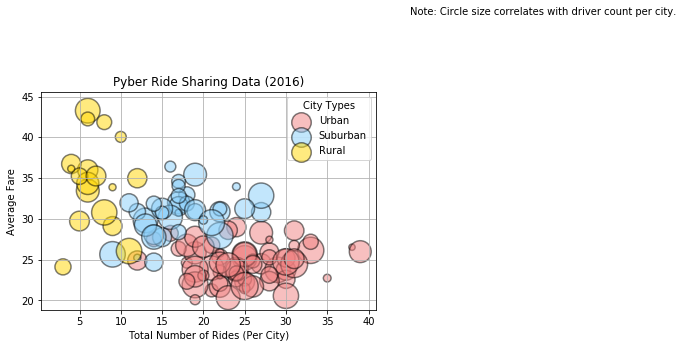

In [38]:
# Obtain the x and y coordinates for each of the three city types
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(True)

# Build the scatter plots for each city types
urban = merge_df[merge_df["type"]=="Urban"]
rural = merge_df[merge_df["type"]=="Rural"]
suburban = merge_df[merge_df["type"]=="Suburban"]

suburban_fare_avg = suburban.groupby(["city"]).mean()["fare"]
suburban_ride_count = suburban.groupby(["city"]).count()["ride_id"]
suburban_driver_count = suburban.groupby(["city"]).mean()["driver_count"]

urban_fare_avg = urban.groupby(["city"]).mean()["fare"]
urban_ride_count = urban.groupby(["city"]).count()["ride_id"]
urban_driver_count = urban.groupby(["city"]).mean()["driver_count"]

rural_fare_avg = rural.groupby(["city"]).mean()["fare"]
rural_ride_count = rural.groupby(["city"]).count()["ride_id"]
rural_driver_count = rural.groupby(["city"]).mean()["driver_count"]


# Incorporate the other graph properties
plt.scatter(urban_ride_count,urban_fare_avg,s=10*urban_driver_count,color = "LightCoral", edgecolor="Black", marker="o",alpha=0.5, linewidths=1.5, label="Urban")
plt.scatter(sub_ride_count,suburban_fare_avg,s=10*urban_driver_count,color = "LightSkyBlue", edgecolor="Black", marker="o",alpha=0.5, linewidths=1.5, label="Suburban")
plt.scatter(rural_ride_count,rural_fare_avg, s=10*urban_driver_count,color = "gold", edgecolor="black", marker="o", alpha=0.5, linewidths=1.5, label="Rural")


# Create a legend
plt.legend(loc= "upper right", title= "City Types")

# Incorporate a text label regarding circle size
plt.text(45, 55,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.show()

## Total Fares by City Type

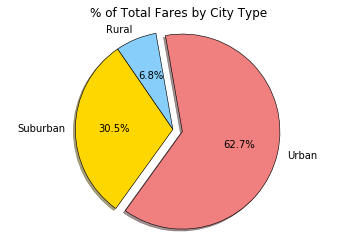

In [40]:
# Calculate Type Percents
by_type = merge_df.groupby("type")["type", "driver_count", "fare", "ride_id"]

fare_sum = by_type.sum()["fare"]


# Build Pie Chart
colors = ["LightSkyBlue", "Gold", "LightCoral"]
explode = [0 , 0, 0.1]
labels = fare_sum.index
plt.pie(fare_sum, startangle = 100, labels = labels, colors = colors, explode = explode, autopct = "%1.1f%%", shadow = True, wedgeprops = {"linewidth": 0.6, "edgecolor": "Black"})

# Save Figure
plt.title("% of Total Fares by City Type")
plt.axis("equal")

plt.show()

## Total Rides by City Type

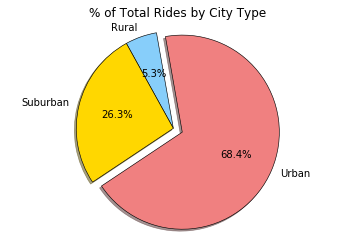

In [46]:

ride_sum = by_type.count()["ride_id"]

labels = ride_sum.index
plt.pie(ride_sum, startangle = 100, labels = labels, colors = colors, explode = explode, autopct = "%1.1f%%", shadow = True, wedgeprops = {"linewidth":0.6, "edgecolor": "black"})
plt.title("% of Total Rides by City Type")
plt.axis("equal")



plt.show()

## Total Drivers by City Type

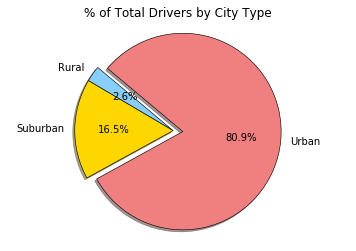

In [52]:
driver_sum = city_df.groupby("type").sum()["driver_count"]

labels = driver_sum.index
plt.pie(driver_sum, startangle = 140, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {"linewidth": 0.6, "edgecolor": "Black"})
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

plt.show()